In [12]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X,Y=make_circles(n_samples=500, shuffle=True, noise=0.05, random_state=1, factor=0.8)

In [49]:
print(X.shape)

(500, 2)


<ipython-input-16-8f93100e7984>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


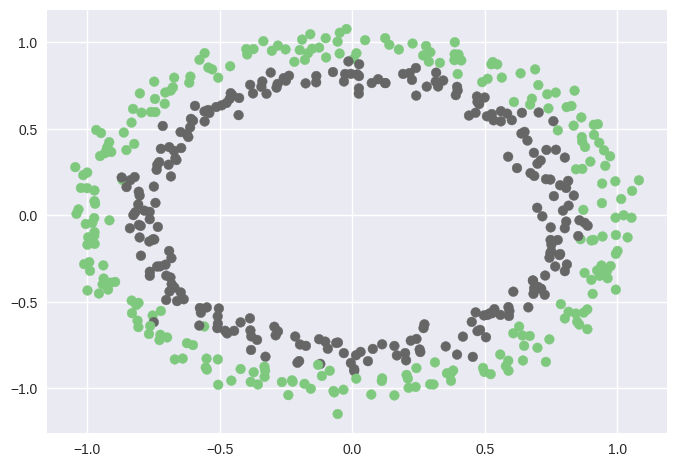

In [16]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

In [17]:
input_size=3
layers=[4,3]
output_size=2

In [18]:
def softmax(a):
  e_pa=np.exp(a)
  ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
  return ans

In [50]:
class NeuralNetwork:
  def __init__(self,input_size,layers,output_size):
    np.random.seed(0)

    model={}

    model['W1']=np.random.randn(input_size,layers[0])
    model['b1']=np.zeros((1,layers[0]))

    model['W2']=np.random.randn(layers[0],layers[1])
    model['b2']=np.zeros((1,layers[1]))

    model['W3']=np.random.randn(layers[1],output_size)
    model['b3']=np.zeros((1,output_size))

    self.model=model

  def forward(self,x):

    W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
    b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']


    z1=np.dot(x,W1)+b1
    a1=np.tanh(z1)

    z2=np.dot(a1,W2)+b2
    a2=np.tanh(z2)

    z3=np.dot(a2,W3)+b3
    y_=softmax(z3)

    self.activation_outputs=(a1,a2,y_)
    return y_

  def backward(self,x,y,learning_rate=0.001):

    W1,W2,W3= self.model['W1'],self.model['W2'],self.model['W3']
    b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
    a1,a2,y_=self.activation_outputs
    m=x.shape[0]


    delta3=y_ - y
    dw3=np.dot(a2.T,delta3)
    db3=np.sum(delta3,axis=0)/float(m)

    delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
    dw2=np.dot(a1.T,delta2)
    db2=np.sum(delta2,axis=0)/float(m)

    delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
    # dw1=np.dot(X.T,delta1)
    dw1=np.dot(x.T,delta1)
    db1=np.sum(delta1,axis=0)/float(m)

    self.model["W1"] -= learning_rate*dw1
    self.model['b1'] -= learning_rate*db1

    self.model["W2"] -= learning_rate*dw2
    self.model['b2'] -= learning_rate*db2

    self.model["W3"] -= learning_rate*dw3
    self.model['b3'] -= learning_rate*db3

  def predict(self,x):
    y_out = self.forward(x)
    return np.argmax(y_out,axis=1)

  def summary(self):
    W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
    a1,a2,y_=self.activation_outputs

    print("W1 ",W1.shape)
    print("A1 ",a1.shape)

    print("W2 ",W2.shape)
    print("A2 ",a2.shape)

    print("W3 ",W3.shape)
    print("Y_ ",y_.shape)






In [51]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l


In [52]:
 def one_hot(y,depth):

    m=y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1

    return y_oht


In [53]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)
model.forward(X)
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


In [54]:
def train(X,Y,model,epochs,learning_rate,logs=True):
  training_loss = []

  classes=2
  Y_OHT = one_hot(Y,classes)

  for ix in range(epochs):

    Y_=model.forward(X)
    l=loss(Y_OHT,Y_)
    training_loss.append(l)
    model.backward(X,Y_OHT,learning_rate)

    if(logs):
      print("Epoch %d loss %.4f"%(ix,l))

  return training_loss

In [55]:
losses=train(X,Y,model,500,0.001)

Epoch 0 loss 0.3584
Epoch 1 loss 0.3486
Epoch 2 loss 0.3480
Epoch 3 loss 0.3478
Epoch 4 loss 0.3476
Epoch 5 loss 0.3475
Epoch 6 loss 0.3474
Epoch 7 loss 0.3473
Epoch 8 loss 0.3472
Epoch 9 loss 0.3472
Epoch 10 loss 0.3471
Epoch 11 loss 0.3471
Epoch 12 loss 0.3470
Epoch 13 loss 0.3470
Epoch 14 loss 0.3469
Epoch 15 loss 0.3469
Epoch 16 loss 0.3469
Epoch 17 loss 0.3469
Epoch 18 loss 0.3468
Epoch 19 loss 0.3468
Epoch 20 loss 0.3468
Epoch 21 loss 0.3468
Epoch 22 loss 0.3467
Epoch 23 loss 0.3467
Epoch 24 loss 0.3467
Epoch 25 loss 0.3467
Epoch 26 loss 0.3467
Epoch 27 loss 0.3466
Epoch 28 loss 0.3466
Epoch 29 loss 0.3466
Epoch 30 loss 0.3466
Epoch 31 loss 0.3466
Epoch 32 loss 0.3466
Epoch 33 loss 0.3465
Epoch 34 loss 0.3465
Epoch 35 loss 0.3465
Epoch 36 loss 0.3465
Epoch 37 loss 0.3465
Epoch 38 loss 0.3465
Epoch 39 loss 0.3464
Epoch 40 loss 0.3464
Epoch 41 loss 0.3464
Epoch 42 loss 0.3464
Epoch 43 loss 0.3464
Epoch 44 loss 0.3464
Epoch 45 loss 0.3464
Epoch 46 loss 0.3463
Epoch 47 loss 0.3463
Ep

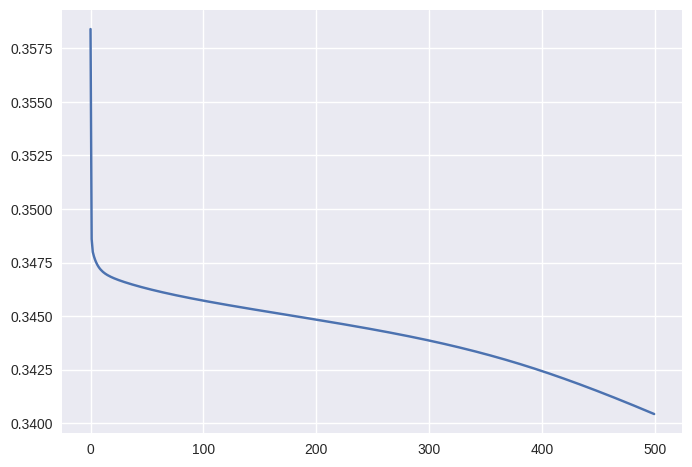

In [56]:
plt.plot(losses)

In [58]:
!pip install visualize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visualize: filename=visualize-0.5.1-py3-none-any.whl size=11479 sha256=7802f54638de98cf4feb07869e6123ee18063494c3d79b094791875a3fcebe7e
  Stored in directory: /root/.cache/pip/wheels/00/3a/5c/36e2da8b63978326a610c9b99af5da59d657ef97b854780d5a
Successfully built visualize


In [62]:
outputs = model.predict(X)

In [66]:
training_accuracy=np.sum(outputs==Y)/Y.shape[0]